In [2]:
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
#nltk.download('all')



In [3]:
# Load the dataset
df = pd.read_csv("data/ESG_daily_news.csv", index_col=None)

In [4]:
#fill NaN with empty string
df = df.fillna('')

In [5]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text)




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

df['text'] = df['text'].apply(preprocess_text)

In [6]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# apply get_sentiment function

df['sentiment'] = df['text'].apply(get_sentiment)
#negative sentiments are 0, positive are 1
df.loc[df['sentiment']==0]

,Date,headline,text,sentiment
12,2022-11-10,Funds Seen Lagging Behind Broader Markets in 2023,The debate whether investing ESG principle min...,0
115,2022-08-02,California Water Prices Climb to Record Amid D...,California water price all-time high severe dr...,0
128,2022-07-24,Hitachi Construction's Value-Chain Sales May E...,,0
145,2022-07-08,The Electric Car Market is About to Get Crazy,The early day new technology tend — put techni...,0
158,2022-06-29,Stellantis Says EV Market Is at Risk Unless Co...,"Unless electric vehicle get cheaper , “ market...",0
171,2022-06-21,"Tesla Layoffs Violated Federal Law, Suit Says",Tesla Inc. sued former employee claim company ...,0
211,2022-05-05,Global Sustainable Debt Sales Fall to Eight-Mo...,Global sustainable debt sale fell eight-month ...,0
269,2022-02-13,Oil Volatility Jumps as Ukraine Tensions Jolt ...,Oil market another erratic week tension ratche...,0
301,2021-12-21,Hedge Funds Seek Legal Advice for ‘Onerous’ Rule,An obscure rule covering ESG investing Europe ...,0
302,2021-12-20,WalMart Sued for Allegedly Dumping Hazardous W...,Walmart sued California allegedly dumping haza...,0


In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")
docs = df['text'].apply(nlp)
ents = []
idx = 0
for doc in docs:
    for ent in doc.ents:
        ents.append([ent.text, ent.label_,idx])
    idx += 1
orgs = []
for a,b,c in ents:
    if b == 'ORG': orgs.append([a,df['sentiment'][c]])
orgs_df = pd.DataFrame(orgs, columns=["org","sentiment"])
print(orgs_df)

                             org  sentiment
0                 Meta Platforms          1
1     Liontrust GF Tortoise Fund          1
2                           Meta          1
3         MSCI USA ETFSeparately          1
4                 Meta Platforms          1
...                          ...        ...
1249                    UNBrazil          1
1250                          EU          1
1251                   OctoberIf          1
1252      China Evergrande Group          1
1253        Sinic Holdings Group          1

[1254 rows x 2 columns]


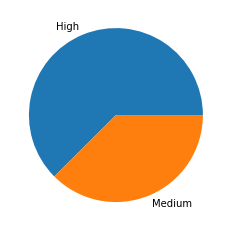

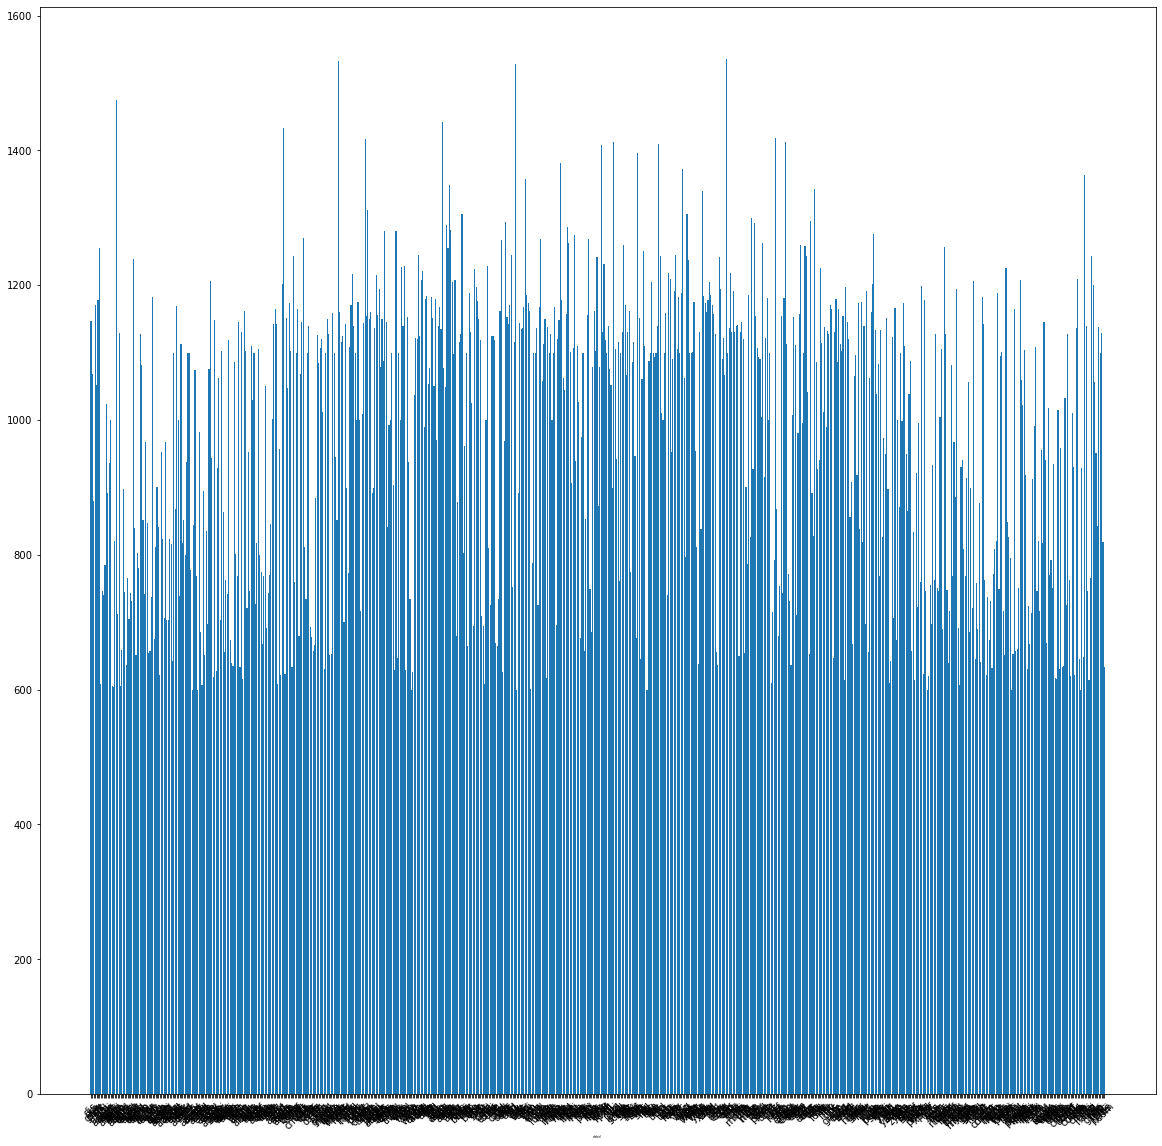

In [8]:
## Visualizations
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df2 = pd.read_csv("data/publiccompanyesgratings.csv")
group_by = df2.groupby("total_level").count().reset_index()
sizes = group_by['ticker']
labels = group_by['total_level']

plt.pie(sizes, labels = labels)
plt.show()
x = df2["ticker"]
y = df2["total_score"]
#ax = df['ESG Risk Level'].value_counts().plot(kind='bar', figsize=(14,8))
# setting the size of the figure
fig = plt.figure(figsize=(20,20))
#ax = df['Total ESG Risk score'].value_counts().plot(kind='bar', figsize=(14,8))
plt.xticks(rotation=45)
plt.xlabel('xlabel', fontsize=3)
plt.bar(x, y)
plt.show()

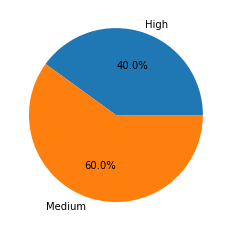

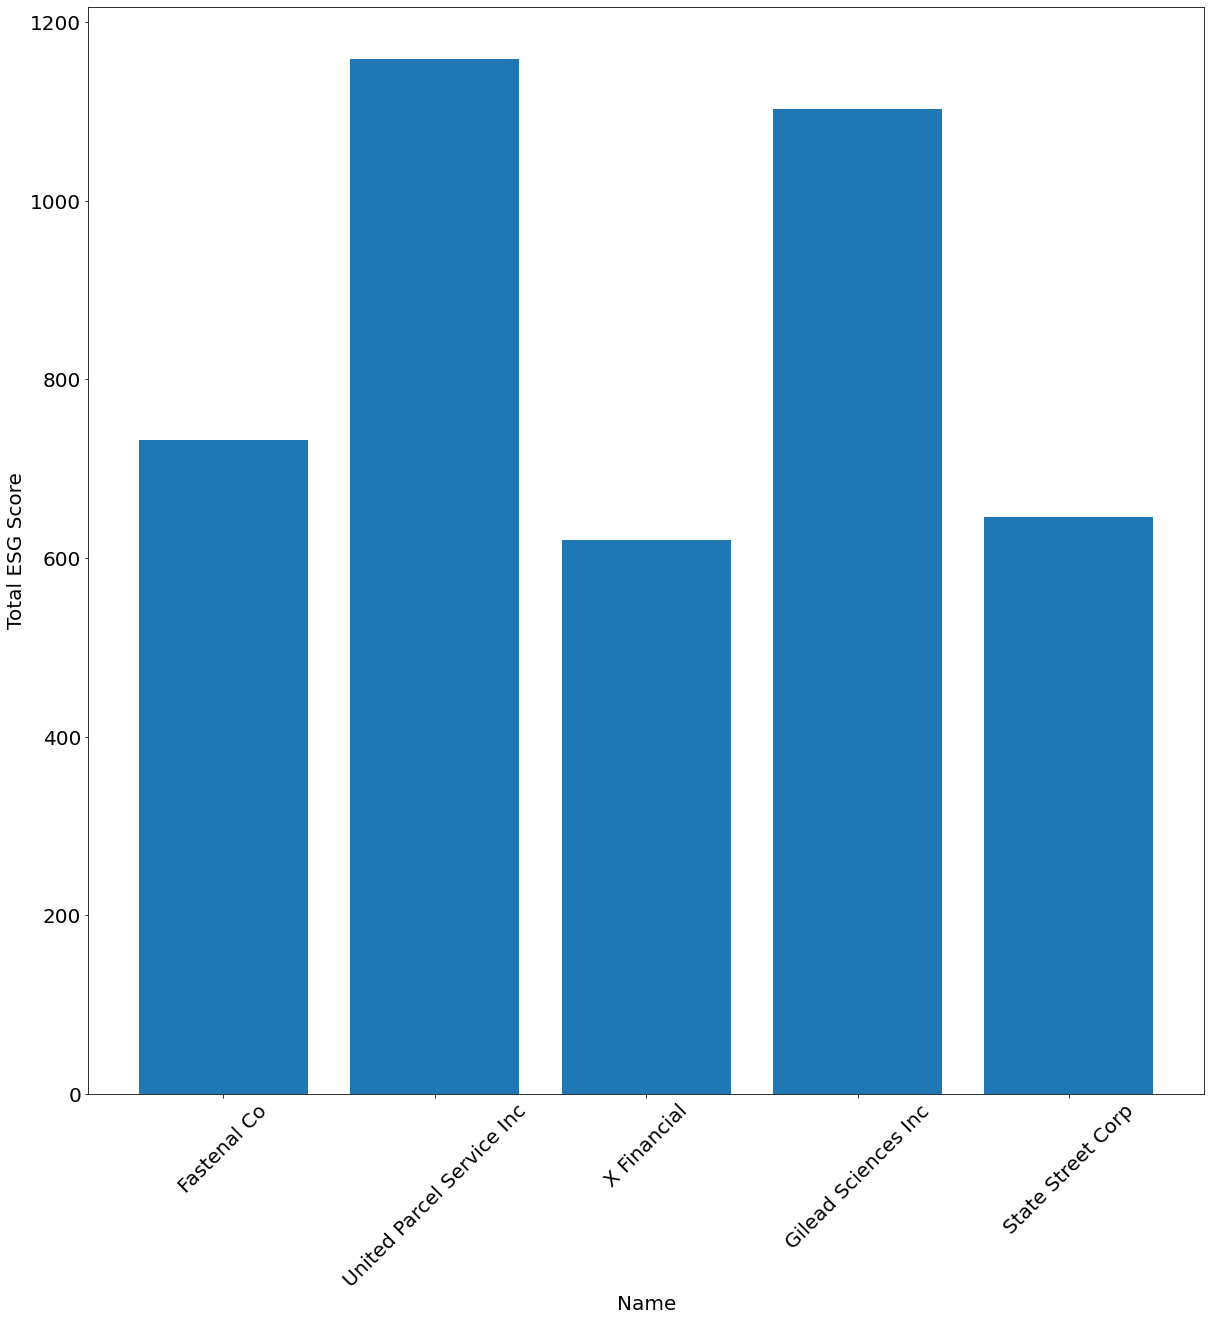

In [33]:
import numpy
def visualizations():
    df2 = pd.read_csv("data/publiccompanyesgratings.csv")
    viz_df = df2.sample(5)
    group_by = viz_df.groupby("total_level").count().reset_index()
    sizes = group_by['ticker']
    labels = group_by['total_level']
    plt.pie(sizes, labels = labels,autopct='%1.1f%%')
    plt.show()
    x = viz_df["name"]
    y = viz_df["total_score"]
    #ax = df['ESG Risk Level'].value_counts().plot(kind='bar', figsize=(14,8))
    # setting the size of the figure
    fig = plt.figure(figsize=(20,20))
    #ax = df['Total ESG Risk score'].value_counts().plot(kind='bar', figsize=(14,8))
    plt.xticks(rotation=45,fontsize=20)
    plt.xlabel('Name', fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Total ESG Score', fontsize=20)
    plt.bar(x, y)
    plt.show()
visualizations()

In [35]:
#Commonalities between News CSV and ratings csv
#common = list(set(orgs_df['org']) & set(df2['name']))
#print(pd.concat([
#    orgs_df[orgs_df.org.isin(common)],
#    df2[df2.name.isin(common)]]))
sent_viz_df = pd.read_csv("data/sentiment_viz.csv", index_col=None)
sent_viz_df

,ticker,org,sentiment,total_score,total_grade,total_level
0,ms,Morgan Stanley,1.0,1178.0,BBB,High
1,gs,Goldman Sachs Group Inc,1.0,1135.0,BBB,High
2,ms,Morgan Stanley,1.0,1178.0,BBB,High
3,ms,Morgan Stanley,1.0,1178.0,BBB,High
4,ms,Morgan Stanley,1.0,1178.0,BBB,High
5,ms,Morgan Stanley,1.0,1178.0,BBB,High
6,ms,Morgan Stanley,1.0,1178.0,BBB,High


In [34]:
var = input("Please enter something: ")
print("You entered: " + var)

You entered: hey
